In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC





# Exploratory Data Analysis



In [7]:

dataframe= pd.read_csv('heart.csv')

#checking for missing values

print("Missing values in dataset:\n", dataframe.isnull().sum())




Missing values in dataset:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
#Basic statistics for the dataset
print("Heart dataset statistic:\n",dataframe.describe())


Heart dataset statistic:
               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
s

# Visual Explanation and Analysis

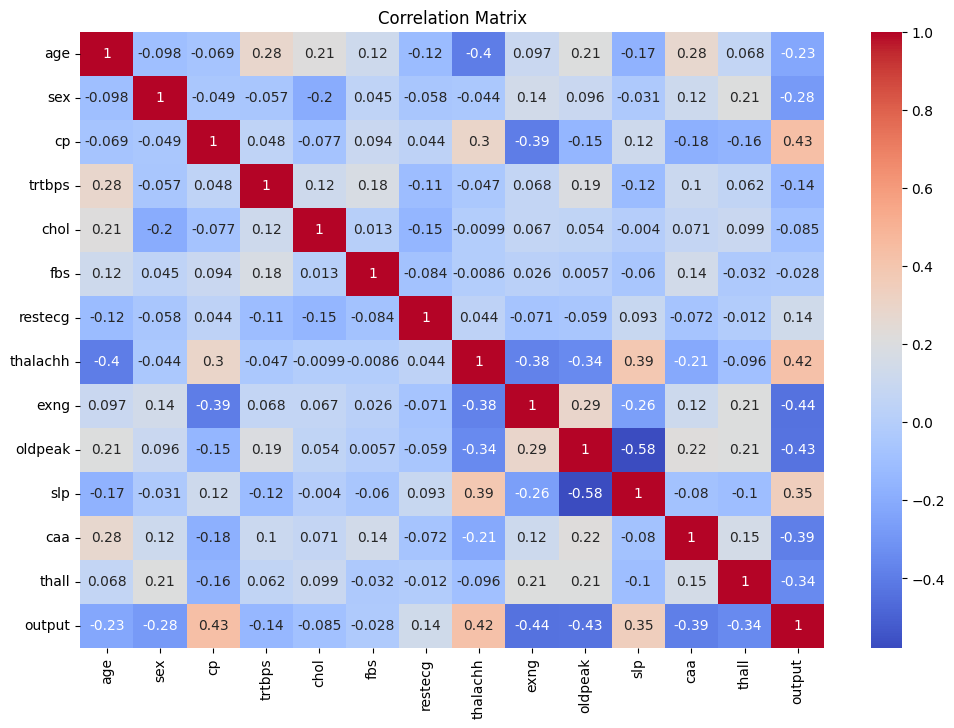

In [9]:
# Correlation Heat map 
CorrMatrix= dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(CorrMatrix, annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [11]:
#Dropping target variable
features = dataframe.drop(dataframe.columns[-1] , axis=1)
target = dataframe[dataframe.columns[-1]]


 #Splitting the data into training and testing sets before PCA
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Standardization
scaler= StandardScaler()
Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)

# feature_standardization now having standardized values with mean 0 and std 1

In [13]:
#PCA , fitting on training data 

pca= PCA(n_components=13)
Xtrain_pca=pca.fit_transform(Xtrain_std)

# Apply the PCA transformation to the test data
Xtest_pca = pca.transform(Xtest_std)


In [14]:
# checking Variance explained ratio, singular values, comulative explained variance by each principal component


explaind_variance = pca.explained_variance_ratio_
singularValues=pca.singular_values_
Cumulative_Variance=np.cumsum(explaind_variance)

#print(f"Explained variance by each component: {explaind_variance}")
#print(f"Total variance explained by the 13 components: {explaind_variance.sum()}")


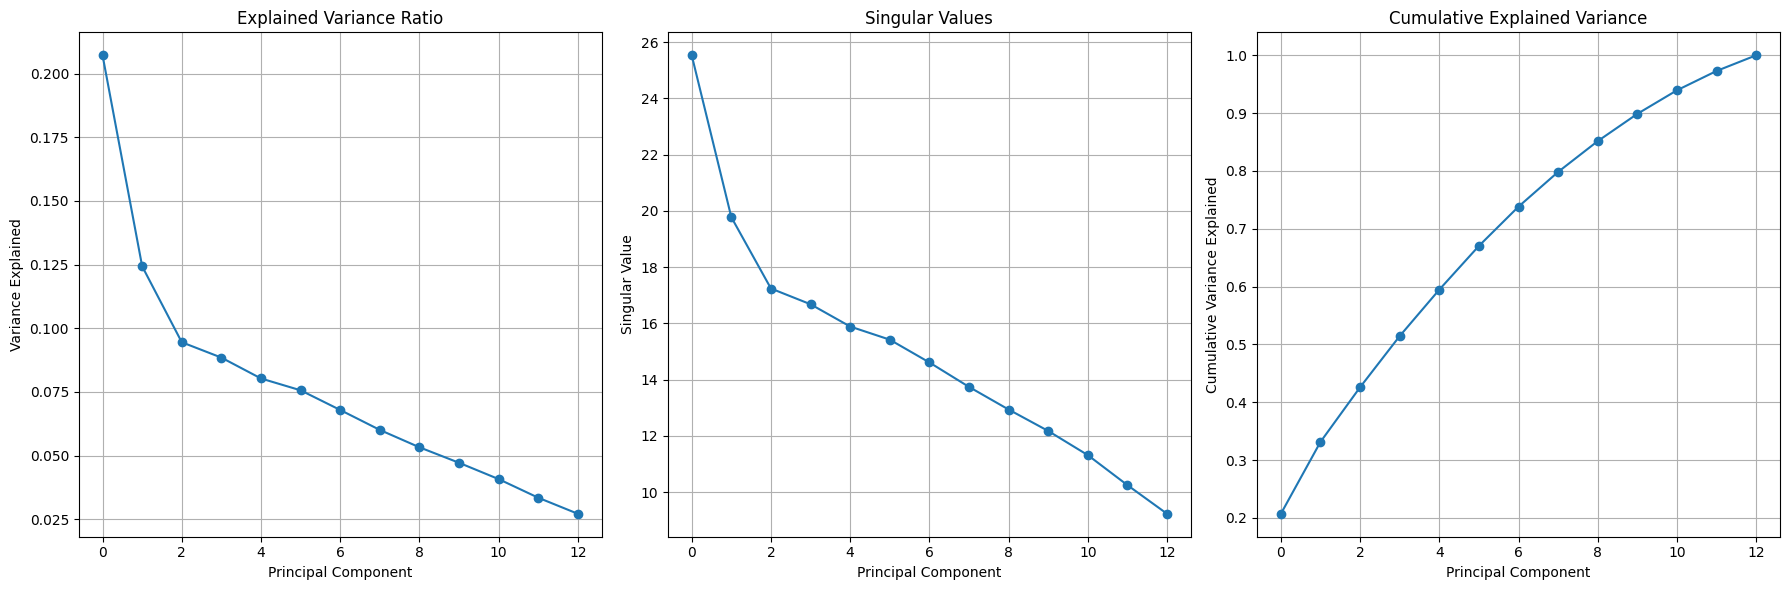

In [15]:
# Creating the subplots to visualize the explained variance, singular values, and cumulative variance
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Explained Variance Ratio Plot
ax1.grid(True)
ax1.set_title("Explained Variance Ratio")
ax1.plot(explaind_variance, marker='o')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')

# Singular Values Plot
ax2.grid(True)
ax2.set_title("Singular Values")
ax2.plot(singularValues, marker='o')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Singular Value')

# Cumulative Explained Variance Plot
ax3.grid(True)
ax3.set_title("Cumulative Explained Variance")
ax3.plot(Cumulative_Variance, marker='o')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()


In [16]:
# Based on the plot, choosing  the number of PCs ( 6) as selecting the number of PCs that explain a significant amount of variance (80% to 90%) described 
#commulative explained variance

n_components = 6
pca= PCA(n_components=n_components)

#Re-fitting PCA on the training data with the chosen number of components
Xtrain_pca = pca.fit_transform(Xtrain_std)

# Transforming the test data using the same PCA model
Xtest_pca = pca.transform(Xtest_std)




In [17]:

# Creating a dataframe with selected PCs for the training data
pcaDF_train = pd.DataFrame(data=Xtrain_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Creating a dataframe with selected PCs for the test data
pcaDF_test = pd.DataFrame(data=Xtest_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [18]:



#Initialize the SVM model with an RBF kernelon PCA transformed trainign data (you can choose other kernels like linear and poly but given data nature here we are using RBF)
svmModel = SVC(kernel='rbf', probability=True, random_state=42)
svmModel.fit(pcaDF_train, y_train)








SVC(probability=True, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
#Evaluation after training has been done
# Make predictions on the test set
y_pred = svmModel.predict(pcaDF_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8689
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[25  4]
 [ 4 28]]


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# Defining the pipeline with StandardScaler, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('pca', PCA(n_components=6)),  # PCA with the selected number of components
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))  # SVM
])

# Performing 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')

# Output the individual fold scores
print(f'Cross-Validation Scores: {cv_scores}')

# Output the mean accuracy and standard deviation
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')


Cross-Validation Scores: [0.7704918  0.8852459  0.81967213 0.88333333 0.76666667]
Mean Cross-Validation Accuracy: 0.8251
Standard Deviation of Cross-Validation Accuracy: 0.0518


In [24]:
from sklearn.model_selection import GridSearchCV


# Define the pipeline with StandardScaler, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('pca', PCA()),  # PCA without specifying n_components to include in the search
    ('svm', SVC(probability=True))  # SVM
])

# Expanding the parameter grid for more comprehensive tuning
paramGrid = {
    'pca__n_components': [5, 10, 13],  # Testing different numbers of PCA components
    'svm__C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'svm__kernel': ['rbf', 'poly', 'sigmoid']  # Different kernel types
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=paramGrid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best accuracy score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

# Print the classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))





Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'pca__n_components': 5, 'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}
Best Cross-Validation Accuracy: 0.8347
Accuracy on Test Set: 0.8852
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

